# n-step method vs. sum of TD error method

### Exercise 7.2
With an n-step method, the value estimates do change from
step to step, so an algorithm that used the sum of TD errors (see previous exercise) in place of the error in (7.2) would actually be a slightly different algorithm. Would it be a better algorithm or a worse one? Devise and program a small experiment to answer this question empirically.

episode: 0
episode: 100
episode: 200
episode: 300
episode: 400
episode: 500
episode: 600
episode: 700
episode: 800
episode: 900
episode: 1000
episode: 1100
episode: 1200
episode: 1300
episode: 1400
episode: 1500
episode: 1600
episode: 1700
episode: 1800
episode: 1900
episode: 2000
episode: 2100
episode: 2200
episode: 2300
episode: 2400
episode: 2500
episode: 2600
episode: 2700
episode: 2800
episode: 2900
episode: 3000
episode: 3100
episode: 3200
episode: 3300
episode: 3400
episode: 3500
episode: 3600
episode: 3700
episode: 3800
episode: 3900
episode: 4000
episode: 4100
episode: 4200
episode: 4300
episode: 4400
episode: 4500
episode: 4600
episode: 4700
episode: 4800
episode: 4900
episode: 5000
episode: 5100
episode: 5200
episode: 5300
episode: 5400
episode: 5500
episode: 5600
episode: 5700
episode: 5800
episode: 5900
episode: 6000
episode: 6100
episode: 6200
episode: 6300
episode: 6400
episode: 6500
episode: 6600
episode: 6700
episode: 6800
episode: 6900
episode: 7000
episode: 7100
epis

episode: 55400
episode: 55500
episode: 55600
episode: 55700
episode: 55800
episode: 55900
episode: 56000
episode: 56100
episode: 56200
episode: 56300
episode: 56400
episode: 56500
episode: 56600
episode: 56700
episode: 56800
episode: 56900
episode: 57000
episode: 57100
episode: 57200
episode: 57300
episode: 57400
episode: 57500
episode: 57600
episode: 57700
episode: 57800
episode: 57900
episode: 58000
episode: 58100
episode: 58200
episode: 58300
episode: 58400
episode: 58500
episode: 58600
episode: 58700
episode: 58800
episode: 58900
episode: 59000
episode: 59100
episode: 59200
episode: 59300
episode: 59400
episode: 59500
episode: 59600
episode: 59700
episode: 59800
episode: 59900
episode: 60000
episode: 60100
episode: 60200
episode: 60300
episode: 60400
episode: 60500
episode: 60600
episode: 60700
episode: 60800
episode: 60900
episode: 61000
episode: 61100
episode: 61200
episode: 61300
episode: 61400
episode: 61500
episode: 61600
episode: 61700
episode: 61800
episode: 61900
episode: 6

episode: 10800
episode: 10900
episode: 11000
episode: 11100
episode: 11200
episode: 11300
episode: 11400
episode: 11500
episode: 11600
episode: 11700
episode: 11800
episode: 11900
episode: 12000
episode: 12100
episode: 12200
episode: 12300
episode: 12400
episode: 12500
episode: 12600
episode: 12700
episode: 12800
episode: 12900
episode: 13000
episode: 13100
episode: 13200
episode: 13300
episode: 13400
episode: 13500
episode: 13600
episode: 13700
episode: 13800
episode: 13900
episode: 14000
episode: 14100
episode: 14200
episode: 14300
episode: 14400
episode: 14500
episode: 14600
episode: 14700
episode: 14800
episode: 14900
episode: 15000
episode: 15100
episode: 15200
episode: 15300
episode: 15400
episode: 15500
episode: 15600
episode: 15700
episode: 15800
episode: 15900
episode: 16000
episode: 16100
episode: 16200
episode: 16300
episode: 16400
episode: 16500
episode: 16600
episode: 16700
episode: 16800
episode: 16900
episode: 17000
episode: 17100
episode: 17200
episode: 17300
episode: 1

episode: 65500
episode: 65600
episode: 65700
episode: 65800
episode: 65900
episode: 66000
episode: 66100
episode: 66200
episode: 66300
episode: 66400
episode: 66500
episode: 66600
episode: 66700
episode: 66800
episode: 66900
episode: 67000
episode: 67100
episode: 67200
episode: 67300
episode: 67400
episode: 67500
episode: 67600
episode: 67700
episode: 67800
episode: 67900
episode: 68000
episode: 68100
episode: 68200
episode: 68300
episode: 68400
episode: 68500
episode: 68600
episode: 68700
episode: 68800
episode: 68900
episode: 69000
episode: 69100
episode: 69200
episode: 69300
episode: 69400
episode: 69500
episode: 69600
episode: 69700
episode: 69800
episode: 69900
episode: 70000
episode: 70100
episode: 70200
episode: 70300
episode: 70400
episode: 70500
episode: 70600
episode: 70700
episode: 70800
episode: 70900
episode: 71000
episode: 71100
episode: 71200
episode: 71300
episode: 71400
episode: 71500
episode: 71600
episode: 71700
episode: 71800
episode: 71900
episode: 72000
episode: 7

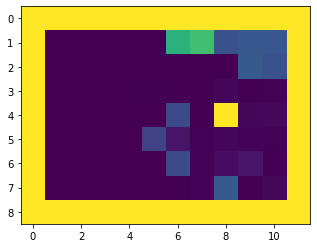

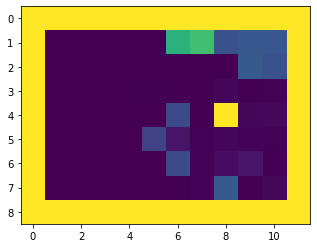

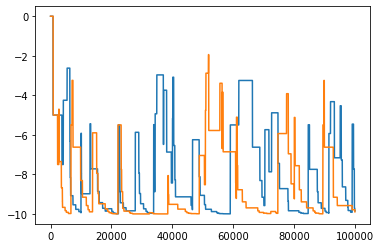

In [74]:
from gym_minigrid.wrappers import FullyObsWrapper

import gym
import gym_minigrid
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


'''
Windy Gridworld

Agent is trained using gym_minigrid
https://github.com/maximecb/gym-minigrid
FullyObsWrapper used to simplify observations

Custom environment "windy.py" adds king's moves & wind
'''

def get_position(obs):
    '''
    Get agent's position from state observations
    
    Parameters
    ----------
        obs : dict
            Observations
    Returns
    -------
        tuple
            Agent's position
    '''
    return (np.where(obs['image'][:,:,0] == 10)[0][0], 
            np.where(obs['image'][:,:,0] == 10)[1][0])

def choose_action(s, Q, epsilon):
    '''
    Chooses epsilon-greedy action
    
    Parameters
    ----------
        s : tuple
            Agent's position
        Q : ndarray
            Action-values
        epsilon : float
            Greediness parameter
    Returns
    -------
        int
            Action to be taken
    '''
    i = random.uniform(0, 1)
    if i < epsilon:
        return random.randint(0, Q.shape[-1] - 1)
    else:
        return np.argmax(Q[s])
    
def train_nstep_TD_sum(env, pi, alpha, gamma, n, max_episode):
    '''
    Estimate v using n-step TD error sum
    
    Parameters
    ----------       
        env : gym environment
            Environment to train in
        pi : func
            Policy to evaluate
        alpha : float
            Convergence parameter
        gamma : float
            Discount parameter
        n : int
            Puts the n in n-step
        max_episode : int
            maximum number of episodes
    Returns
    -------
        ndarray
            state-value function for pi
    '''
    vs = []
    v = np.zeros((10+2, 7+2)) # +2 to pad environment boundaries
    episode = 0
    
    while episode < max_episode:
        if episode % 100 == 0:
            print('episode: {}'.format(episode))
        obs = env.reset()
        done = False
        st = get_position(obs)
        s = [st]
        r = [0] # R_0 = 0
        tau = 0
        T = math.inf
        t = 0
        
        while tau != T - 1:
            if t < T:
                a = pi(st)
                obs, reward, done, info = env.step(a)
                st = get_position(obs)
                s.append(st)
                r.append(reward)
                if done:
                    T = t + 1
            tau = t - n + 1
            if tau >= 0:
                gammas = np.array([gamma ** (i - tau) for i in range(tau, min(tau + n - 1, T - 1) + 1)])
                deltas = np.array([r[i + 1] + gamma * v[s[i + 1]] - v[s[i]] for i in range(tau, min(tau + n - 1, T - 1) + 1)])
                error = np.sum(gammas * deltas)
                v[s[tau]] = v[s[tau]] + alpha * error
            t += 1
            
        env.close()
        episode += 1
        vs.append(v.copy())
        
    return vs

def train_nstep_TD(env, pi, alpha, gamma, n, max_episode):

    vs = []
    v = np.zeros((10+2, 7+2)) # +2 to pad environment boundaries
    episode = 0
    
    while episode < max_episode:
        if episode % 100 == 0:
            print('episode: {}'.format(episode))
        obs = env.reset()
        done = False
        st = get_position(obs)
        s = [st]
        r = [0] # R_0 = 0
        tau = 0
        T = math.inf
        t = 0
        
        while tau != T - 1:
            if t < T:
                a = pi(st)
                obs, reward, done, info = env.step(a)
                st = get_position(obs)
                s.append(st)
                r.append(reward)
                if done:
                    T = t + 1
            tau = t - n + 1
            if tau >= 0:
                gammas = np.array([gamma ** (i - tau - 1) for i in range(tau + 1, min(tau + n, T) + 1)])
                r_sub = np.array(r[tau + 1:len(gammas) + tau + 1])
                g = np.sum(r_sub * gammas)
                if tau + n < T:
                    g += gamma ** n * v[s[tau + n]]
                v[s[tau]] = v[s[tau]] + alpha * (g - v[s[tau]])
            t += 1

        env.close()
        episode += 1
        vs.append(v.copy())
    
    return vs

def run(env):
    alpha = 0.5
    gamma = 0.9
    n = 100
    max_episode = 100000
    
    def pi(st):
        # Use a stochastic policy
        return random.randint(0, 8)
    
    vs2 = train_nstep_TD_sum(env, pi, alpha, gamma, n, max_episode)
    vs1 = train_nstep_TD(env, pi, alpha, gamma, n, max_episode)
    
    return vs1, vs2

if __name__ == '__main__':
    # Ex 7.2
    env = gym.make('MiniGrid-Windy-10x7-v0')
    env = FullyObsWrapper(env)
    vs1, vs2 = run(env)
    vs1 = np.array(vs1)
    vs2 = np.array(vs2)

    with open('windy_values.npy', 'wb') as f:
        np.save(f, vs1)
        np.save(f, vs2)
        
    plt.figure()
    plt.imshow(vs1[-1,:,:].T)
    plt.figure()
    plt.imshow(vs1[-1,:,:].T)
    plt.figure()
    plt.plot(vs2[:,7,7])
    plt.plot(vs1[:,7,7])